# Title: Kick and Punch Classifier

![Example Image](static/images/1.png)

#### Authors: Jorge Luis Gallarraga, Sirjana Shrestha, Mark Kale, Parthasarthy Amit

### Abstract

This project focuses on developing a classifier to identify kicks and punches in MMA fights using a dataset consisting of 597 annotated images captured from raw MMA fights, courtesy of Roboflow. Initially, we trained five models with four image classes: kick, punch, kicknt (kick not), and punchnt (punch not). However, these models only achieved an average accuracy of 30%, and despite various attempts like data augmentation and using different models for training, we couldn't improve their performance.

To address this issue, we simplified the problem by removing the kicknt and punchnt classes and retrained the five models with just two classes: kick and punch. This modification resulted in a significant improvement, with an average accuracy increase of 30% across all models.

In an effort to further enhance the performance, we decided to experiment with the YoloV8n classify model. To ensure fair comparisons, we conducted experiments using both the original dataset with four classes and the simplified dataset with two classes. These experiments aimed to identify the most suitable model and approach for accurately classifying kicks and punches in MMA fights.

Among the six models we trained, YOLOV8 model was the best performer with the accuracy of 75% and EfficientNET was the least performer with accuracy of  53.12%. We have also created a Streamlit app for kick and punch classifier using YOLOV8 model.

### Introduction

The MMA industry is experiencing rapid growth with a surge in global viewership and participation. However, compared to other sports, the sports analytics sector within MMA remains underdeveloped, creating a promising opportunity for innovative solutions. Performance analysis in MMA is intricate due to the diverse set of skills involved, often relying heavily on human expertise. To address this gap, we have come up with this idea for an advanced classifier app that can accurately identify and classify kicks and punches, providing a valuable tool for MMA fights.

### Related Work

### Data

We have developed a custom dataset from scratch by carefully observing MMA's videos on YouTube and collecting various fight images from the internet. This dataset comprises four distinct classes: "kick," "kicknt" (not touch), "punch," and "punchnt" (not touch).

To streamline the process of image classification and dataset splitting, we used Roboflow tool, which proved to be exceptionally beneficial, providing us with an efficient and user-friendly solution. With Roboflow, we were able to organize, annotate, and categorize the images accurately, making it a valuable asset for our project.

Tha dataset can be downloaded from; https://universe.roboflow.com/georgebrown/punch-and-kick-detection-group

##### Our dataset and classes

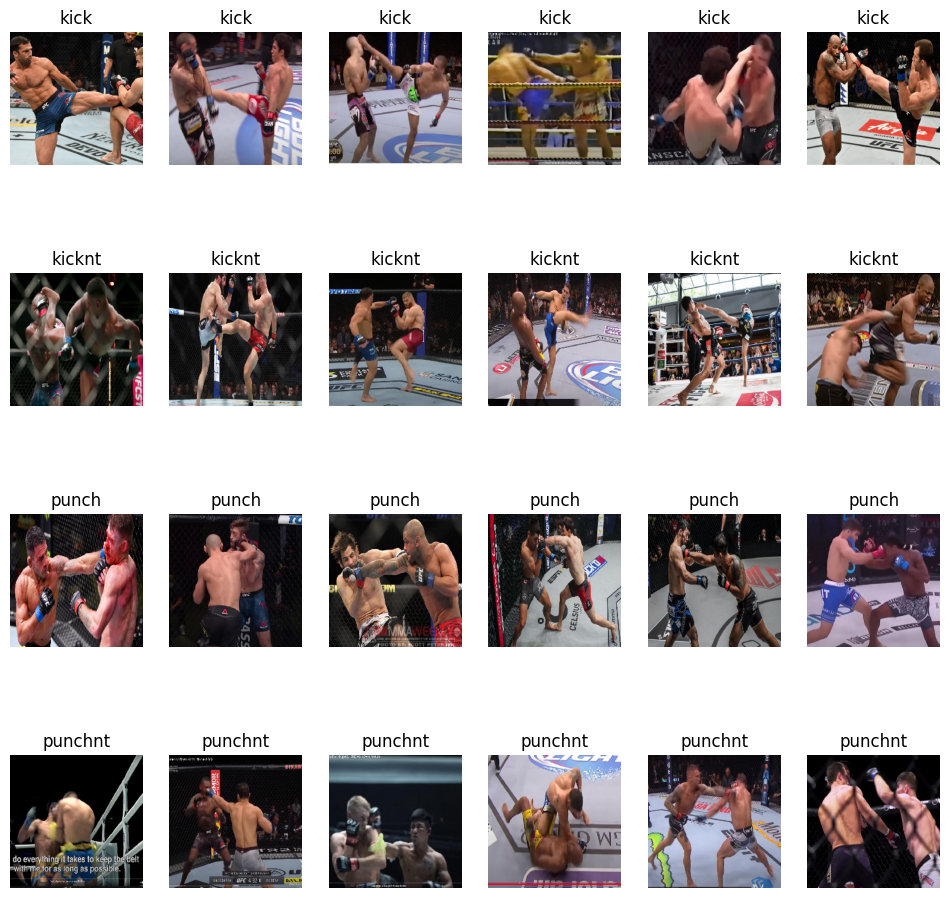

In [ ]:
# Number of samples per class to display
num_samples_per_class = 6

# Function to display sample images from each class
def show_sample_images(data_dir, classes, num_samples_per_class):
    plt.figure(figsize=(12,12))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        class_images = random.sample(os.listdir(class_dir), num_samples_per_class)

        for j, image_name in enumerate(class_images):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, target_size=(weight_size, height_size))

            plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# Call the function to show sample images from each class
show_sample_images(train_path, classes, num_samples_per_class)


### Methods

Initially, we trained five models with four image classes: kick, punch, kicknt (kick not), and punchnt (punch not). However, these models only achieved an average accuracy of 30%, and despite various attempts like data augmentation and using different models for training, we couldn't improve their performance.

To address this issue, we simplified the problem by removing the kicknt and punchnt classes and retrained the five models with just two classes: kick and punch. This modification resulted in a significant improvement, with an average accuracy increase of 30% across all models.

In an effort to further enhance the performance, we decided to experiment with the YoloV8n classify model. To ensure fair comparisons, we conducted experiments using both the original dataset with four classes and the simplified dataset with two classes.

##### Our dataset with data augmentation

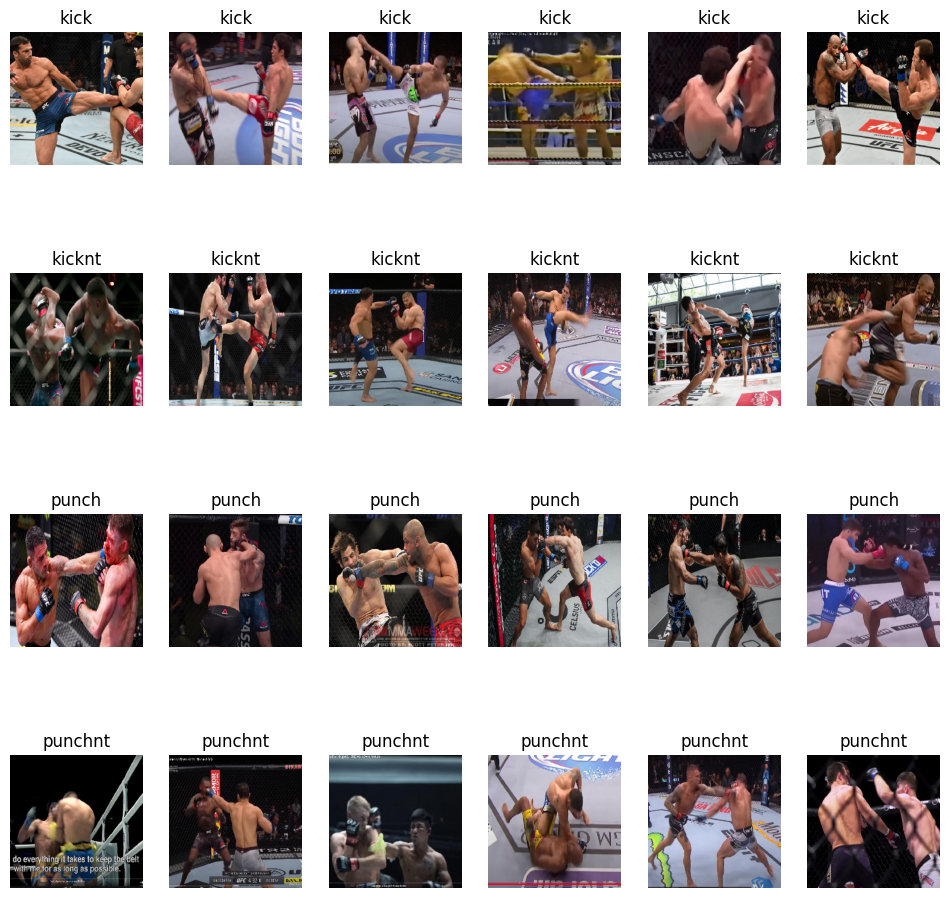

In [ ]:
# Number of samples per class to display
num_samples_per_class = 6

# Function to display sample images from each class
def show_sample_images(data_dir, classes, num_samples_per_class):
    plt.figure(figsize=(12,12))

    for i, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        class_images = random.sample(os.listdir(class_dir), num_samples_per_class)

        for j, image_name in enumerate(class_images):
            image_path = os.path.join(class_dir, image_name)
            image = load_img(image_path, target_size=(weight_size, height_size))

            plt.subplot(len(classes), num_samples_per_class, i * num_samples_per_class + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')

    plt.show()

# Call the function to show sample images from each class
show_sample_images(train_path, classes, num_samples_per_class)


### Experiments

##### First, we trained 5 models with 4 classes

1. VGG16 model with 100.356 trainable params and 14.815.044 total params, no dropout but with data augmentation

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_vgg_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:30:02.862289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 2s 1s/step - loss: 1.3956 - accuracy: 0.3443
Test accuracy: 0.344


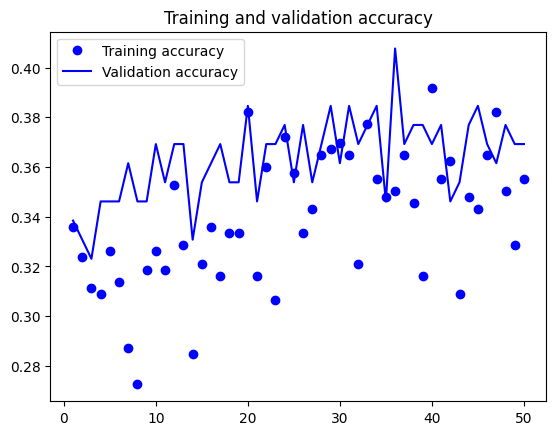

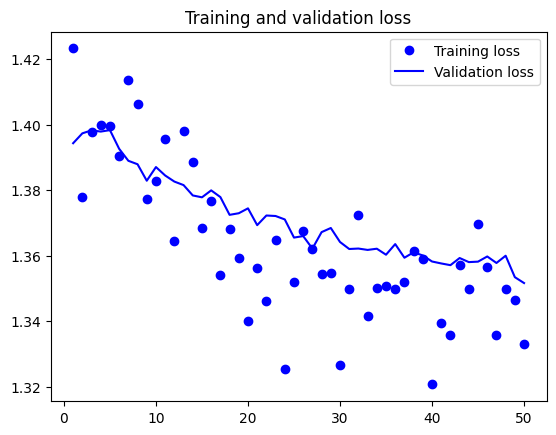

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

2. ResNet50V2 with 401.412 trainable parameters and 23.966.212 total params, no dropout but with data augmentation

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_resnet_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:32:57.575761: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 1s 548ms/step - loss: 8.8857 - accuracy: 0.3115
Test accuracy: 0.311


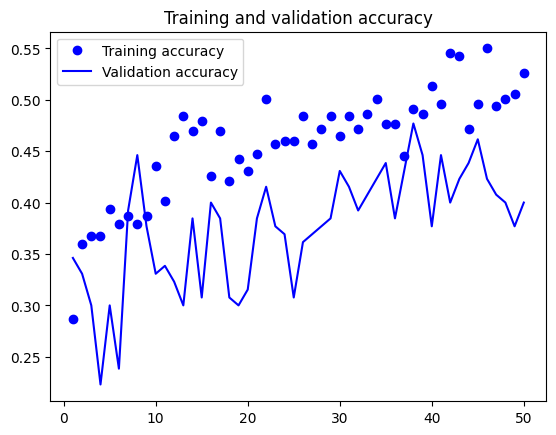

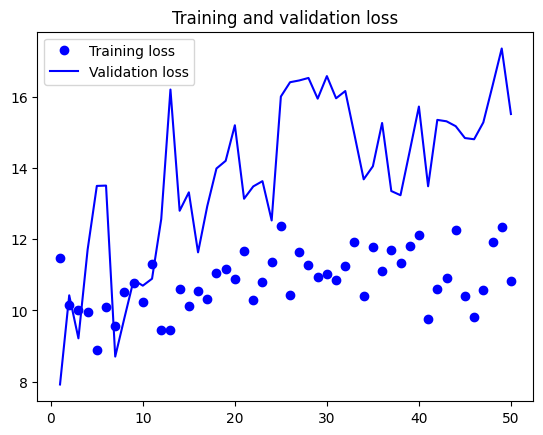

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

3. InceptionResNetV2 with 3.985.412 trainable parameters and 55.125.732 total params, with dropout of 0.5, Average Pooling and a fully connect layer

In [ ]:
test_model = keras.models.load_model(
    "./models/convnet_inceptionResnet_4_classes.keras")
test_loss, test_acc = test_model.evaluate(test_set)
print(f"Test accuracy: {test_acc:.3f}")

2023-07-31 22:36:44.943435: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


2/2 [==============================] - 3s 2s/step - loss: 1.3807 - accuracy: 0.3443
Test accuracy: 0.344


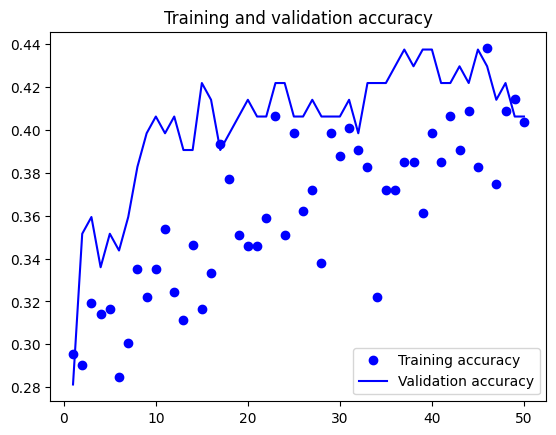

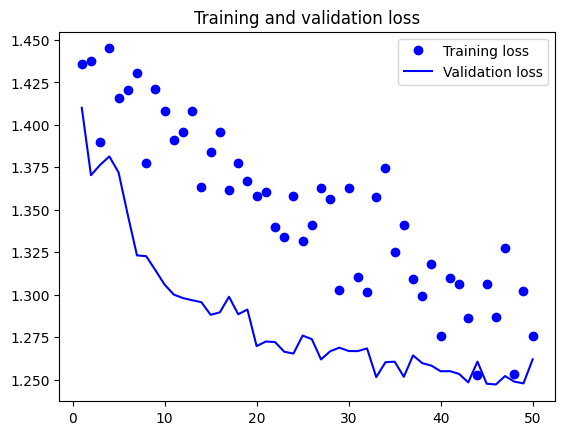

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

4. MobileNETV2 with 726,820 trainable parameters and 2,985,828 total parameters, with dropout of 0.3, Average Pooling and a fully connected layer

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1296/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


2/2 [==============================] - 0s 189ms/step - loss: 1.4826 - accuracy: 0.2500
Test Accuracy:  25.0 %


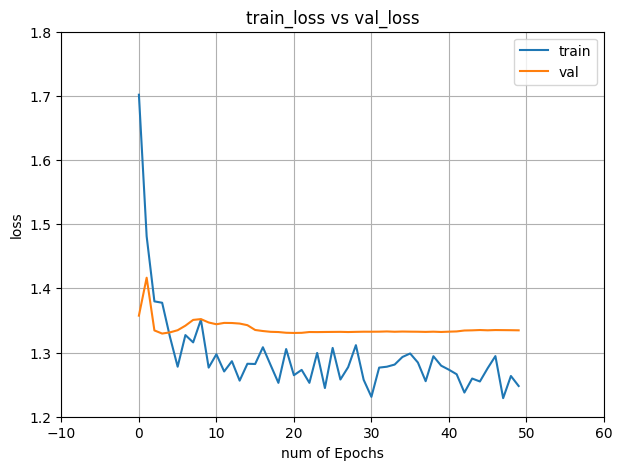

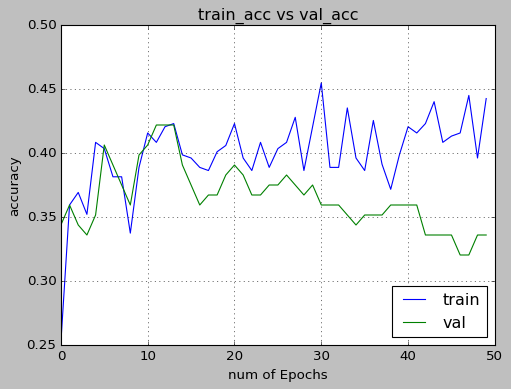

In [ ]:
epochs = 50
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

5. EfficientNET with 4,012,672 trainable parameters and 4,054,688 total parameters, with dropout of 0.5, GlobalAveragePooling and a fully connected layer

In [ ]:
test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)

print('Test Accuracy: ', round((test_accuracy * 100), 2), "%")

/var/folders/qn/c0ll_4m107d0w2b21m8wkgz80000gn/T/ipykernel_1296/1841467748.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_accuracy = model.evaluate_generator(generator = test_set, verbose = 1)


2/2 [==============================] - 1s 421ms/step - loss: 1.3885 - accuracy: 0.3167
Test Accuracy:  31.67 %


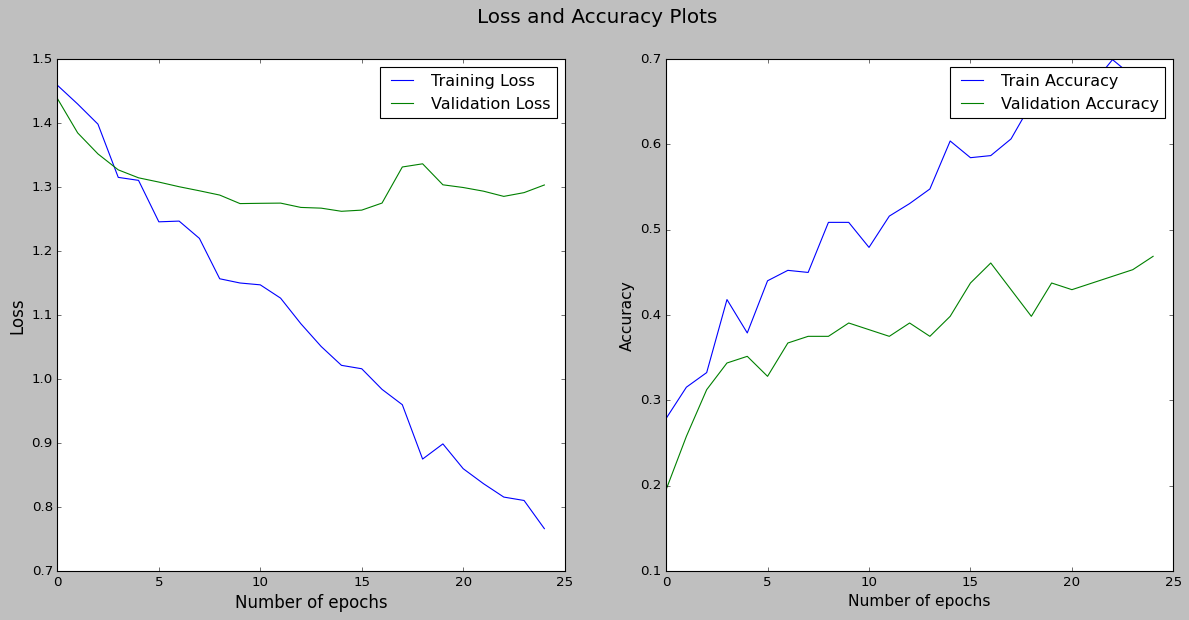

In [ ]:
#plot to visualize the loss and accuracy against number of epochs
plt.figure(figsize=(18,8))

plt.suptitle('Loss and Accuracy Plots', fontsize=18)

plt.subplot(1,2,1)
plt.plot(model_history.history['loss'], label='Training Loss')
plt.plot(model_history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Number of epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)

plt.subplot(1,2,2)
plt.plot(model_history.history['accuracy'], label='Train Accuracy')
plt.plot(model_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

##### Then we noticed that, accuracy with all five models are so low, so we decided to remove two classes and trained all the models again

#### Model Results

| Model VS Accuracy | With 4 classes | With 2 classes |
| ------------------| -------------- | -------------- |
| VGG 16            | 34.4%          |  63.3%         |
| ResNet50V2        | 31.1%          |  56.7%         |
| InceptionResNetV2 | 34.4%          |  60%           |
| MobileNETV2       | 25%            |  65.62%        |
| EfficientNET      | 31.67%         |  53.12%        |
| YOLO V8           | 47.5%          |  75%           |

Link to Streamlit app: https://kick-and-punch-classifier.streamlit.app/

### Conclusion